# エネルギーベースモデル

任意の$\boldsymbol{x} \in \mathbb{R}_D$を入力としてとる，エネルギー関数を考える．

$E_{\theta}:\mathbb{R}_D \rightarrow \mathbb{R}$

エネルギーベースモデル
$$
p_{\theta}(\boldsymbol{x}) = \frac{1}{Z_{\theta}}\exp(-E_{\theta}(\boldsymbol{x}))
$$

ここで，$Z_{\theta}$は正規化定数であり，次のように定義される．
$$
Z_{\theta} = \int \exp(-E_{\theta}(\boldsymbol{x}))d\boldsymbol{x}
$$

この形式の分布は，統計物理におけるボルツマン分布と呼ばれる．

エネルギーを反転させた関数を，ハーモニー関数と呼ぶ．

統計物理では，エネルギーが低い状態が安定状態なので，マイナスをつけて低い値が尤度最大に対応させる．


確率変数$x, y$をもつEBMの同時分布は，
$$
p_{\theta}(x, y) = \frac{1}{Z_{\theta}}\exp(-E_{\theta}(\boldsymbol{x}, \boldsymbol{y}))
$$

$E_{\theta}(\boldsymbol{x}, \boldsymbol{y})$は，両変数の適合性を表す．

変数間の方向を定義しないので，無向モデル


クリーク：全てが互いに接続されているノードの部分集合．

一般に，$\boldsymbol{x}$の無向モデルは，グラフのクリークごとの因子によって定義される．

いっぱい変数がある時は，クリークごとに変数間の県警を考えるだけ．

潜在変数を持つEBM



潜在変数＄\boldsymbol{z}$と，観測変数$\boldsymbol{x}$を持つEBMの同時分布は，
$$
p_{\theta}(\boldsymbol{x}, \boldsymbol{z}) = \frac{1}{Z_{\theta}}\exp(-E_{\theta}(\boldsymbol{x}, \boldsymbol{z}))
$$

これを周辺化．

$$
p_{\theta}(\boldsymbol{x}) = \int p_{\theta}(\boldsymbol{x}, \boldsymbol{z})d\boldsymbol{z}
$$

自由エネルギーを導入する．

学習の仕方はデータ分布からのサンプルのエネルギーと，モデル分布からのサンプルのエネルギーで計算．

Negative Phaseでは，生成モデルからのサンプリングが必要であることがわかる．

生成モデルからどうやってサンプリングするねん．

→モデルの構造を工夫することが多い．

## ボルツマンマシン

さっきの生成モデルからのサンプリングのための，工夫した構造．

## DNNによるEBM

ボルツマンマシン自体は，最近では使われることは少なくなった．

したがって今回は，EBMにおいて，モダンなDNNを使用していく方法を考える．

制約付きボルツマンマシンなどでは，高次元のデータを扱えない．

そこで，DNNでエネルギー関数をパラメータ化する．

入力をデータ，出力をスカラー値のエネルギーとする．

問題
- 結局EBMで一番難しいのは，モデル分布からのサンプリング．

ここをどうするか．

- ランジェバンダイナミクス

生成モデルからのサンプリングを，次のように反復的に行う．

あとで修正↓
$$
\boldsymbol{x}^{(t+1)} = \boldsymbol{x}^{(t)} + \epsilon \frac{\partial E_{\theta}(\boldsymbol{x}^{(t)})}{\partial \boldsymbol{x}^{(t)}}
$$

これはある意味ギブスサンプリングの連続値版と言える．
MCMCの一種．

ノイジーな勾配降下法みたいなもの．

これをやると安定してサンプリングすることができる．

ノイズがだんだん取れていくような挙動はまさにLDの過程．

LDを使うのは変わらないけど，もっと安定化するために，いろいろな手法がある．

- LDの初期値を一葉分布だけでなく，過去のサンプル効果も利用．

- エネルギー関数へのリプシッツ制約(GANを参照)やL2正則化を加える．

同時分布の対数尤度を最大化してやると，生成モデルと識別モデルどちらも学習できる．

これで，生成モデル，識別モデルどちらも得ることができる．

EBMの利点と欠点
- 利点
    - アーキテクチャの制約が少ない
    - 単一のモデルで安定した学習ができる．
    - 計算コスト，生成のクオリティを調整できる．(LDのステップ数によって)
- 欠点
    - 尤度を明示的に計算できない．(フローベース，自己回帰に比べての欠点)
    - 生成するためには，反復的な確率最適化が必要．(LDを毎回毎回回さないといけない．)

近年，様々なEBMの研究が進められている．

これまで，生成モデルは，確率分布を定義してきた．

データ分布とモデル分布が近くなるように学習させるということ．

潜在変数モデルであれば，EMアルゴリズムによる最尤推定を行った．

VAEであれば，基本は潜在変数モデルにならうが，確率分布をそのままニューラルネットワークでおくことで，最尤推定を行った．

GANであれば，モデル分布とデータ分布を近づけることに重きを置き，二つの分布の密度比が小さくなるように学習することで，データ分布を近似した．(その際に生成モデルと識別モデルをしようする．)

では，EBMはどうか．

EBMは，そもそも確率分布を直接定義しない．その代わり，データのエネルギーを定義する．そして低エネルギー領域を高確率とすることで生成モデルを獲得する．

モデル分布を定義する．(直接定義しないと言ったのはデータ分布の方ね．)
$$
p_{\theta}(\boldsymbol{x}) = \frac{1}{Z_{\theta}}\exp(-E_{\theta}(\boldsymbol{x}))
$$
エネルギー関数があって，それを規格化定数の$Z_{\theta}$で割ることで確率分布を定義する．

これは，エネルギーが低い時に確率が高くなるようになってる．

これの対数尤度を最大化することで，直接定義していないデータ分布を近似することができる．

モデル分布の負の対数尤度は，
$$
\begin{align*}
-\log \prod_{i=1}^N p_{\theta}(\boldsymbol{x}_i) &= - \log \prod_{i=1}^N \frac{1}{Z_{\theta}}\exp(-E_{\theta}(\boldsymbol{x}_i))\\
\sum_{i=1}^{N} -\log p_{\theta}(\boldsymbol{x}_i)&= - \sum_{i=1}^N \log \frac{1}{Z_{\theta}}\exp(-E_{\theta}(\boldsymbol{x}_i))\\
\sum_{i=1}^{N} -\log p_{\theta}(\boldsymbol{x}_i)&= \sum_{i=1}^N E_{\theta}(\boldsymbol{x}_i) + N\log{Z_{\theta}}\\
\frac{1}{N}\sum_{i=1}^{N} -\log p_{\theta}(\boldsymbol{x}_i)&=\frac{1}{N}\sum_{i=1}^{N} E_{\theta}(\boldsymbol{x}_i) + \log Z_{\theta}
\end{align*}
$$
この状態まで持っていく．途中で$\frac{1}{N}$をかけているのは，この後の操作をやりやすくするため．(多分)

$\frac{1}{N}\sum_{i=1}^{N}$は，期待値を表している．また，ここでの$\boldsymbol{x}_i$は，データ分布からのサンプルを表している．

※そもそも，教師データとしてサンプルを渡すので，それはデータ分布からのサンプルそのものである．

ということは，$\frac{1}{N}\sum_{i=1}^{N}$は，データについて期待値を取る操作なので，データ分布についての期待値と言い表すことができる．

それを数式で表すと，
$$
\mathbb{E}_{\boldsymbol{x} \sim p_{data}}[-\log p_{\theta}(\boldsymbol{x})] = \mathbb{E}_{\boldsymbol{x} \sim p_{data}}[E_{\theta}(\boldsymbol{x})] + \log Z_{\theta}
$$

こうなる．次に，パラメータについての勾配をとる．

※損失関数(負の対数尤度)を最小化するために，勾配を求める．その後，勾配＝0となるようにパラメータを更新すれば，損失関数が最小，尤度が最大，エネルギーが最小，データ分布とモデル分布が近づいた．ということになるね．

$$
\nabla_{\theta}\mathbb{E}_{\boldsymbol{x} \sim p_{data}}[-\log p_{\theta}(\boldsymbol{x})] = \nabla_{\theta}\mathbb{E}_{\boldsymbol{x} \sim p_{data}}[E_{\theta}(\boldsymbol{x})] + \nabla_{\theta}\log Z_{\theta}
$$

ここで，対数関数の微分の性質を使う．[参考](https://www.try-it.jp/chapters-7403/sections-7421/lessons-7446/)

また，$Z_{\theta} = \int \exp (-E_{\theta}(\boldsymbol{x}))d\boldsymbol{x}$より，
$$
\begin{align*}
\nabla_{\theta}\log Z_{\theta} &= \frac{\nabla_{\theta}Z_{\theta}}{Z_{\theta}}\\
&= \frac{\nabla_{\theta}\int \exp (-E_{\theta}(\boldsymbol{x}))d\boldsymbol{x}}{Z_{\theta}}\\
\end{align*}
$$

ライプニッツの積分則により，

※ここの照明は飛ばす．(理解してないので)また，これが成立するのは，$E_{\theta}(\boldsymbol{x})$が十分に滑らかである時．機械学習のコンテキストでは滑らかであると仮定してあるのでよし．
他にも，微分が，積分区間で一様に収束する．積分区間が$\theta$に依存しないなどの条件がある．ここでは満たされているとする．

$$
= \frac{\int \nabla_{\theta} \exp (-E_{\theta}(\boldsymbol{x}))d\boldsymbol{x}}{Z_{\theta}}\\
$$

指数関数の微分により，

※$\frac{d}{dx}e^{f(x)} = f'(x)e^{f(x)}$

$$
=-\frac{\int \exp (-E_{\theta}(\boldsymbol{x}))\nabla_{\theta}E_{\theta}(\boldsymbol{x}))d\boldsymbol{x}}{Z_{\theta}}
$$

※-を出していることに注意．インテグラルの外に出すのは別に変な操作じゃないね．

次に，これを整理する．

$Z_{\theta}$は，$\theta$には依存するが，$\boldsymbol{x}$に依存しない関数なので，インテグラルの中に入れても問題ない．($d\boldsymbol{x}$って書いてあるとおり，この積分は$\boldsymbol{x}$についてだからね．)

$$
= -\int\frac{ \exp (-E_{\theta}(\boldsymbol{x}))}{Z_{\theta}}\nabla_{\theta}E_{\theta}(\boldsymbol{x})d\boldsymbol{x}
$$

$frac{\exp (-E_{\theta}(\boldsymbol{x}))}{Z_{\theta}}$は，モデル分布$p_{\theta}(\boldsymbol{x})$の定義そのものである．よって，

$$
= -\int p_{\theta}(\boldsymbol{x})\nabla_{\theta}E_{\theta}(\boldsymbol{x})d\boldsymbol{x}
$$

この形式は，期待値の定義そのものである．

※ 期待値の定義：$\mathbb{E}[f(x)] = \int p(x)f(x)dx$

$$
= -\mathbb{E}_{\boldsymbol{x} \sim p_{\theta}}[\nabla_{\theta}E_{\theta}(\boldsymbol{x})]
$$

第二項について，整理してきた，いま式全体としては，こうなっている．

$$
\begin{align*}
\nabla_{\theta}\mathbb{E}_{\boldsymbol{x} \sim p_{data}}[-\log p_{\theta}(\boldsymbol{x})] &= \nabla_{\theta}\mathbb{E}_{\boldsymbol{x} \sim p_{data}}[E_{\theta}(\boldsymbol{x})] + \nabla_{\theta}\log Z_{\theta}\\
&= \nabla_{\theta}\mathbb{E}_{\boldsymbol{x} \sim p_{data}}[E_{\theta}(\boldsymbol{x})]-\mathbb{E}_{\boldsymbol{x} \sim p_{\theta}}[\nabla_{\theta}E_{\theta}(\boldsymbol{x})]
\end{align*}
$$

第一項についても整理する．

第一項は，元々は$\frac{1}{N}\sum_{i=1}^{N} E_{\theta}(\boldsymbol{x}_i)$であった．

この式の$\boldsymbol{x}_i$はデータ分布からサンプリングされたものなので，式を以下のように表すことができる．

期待値の定義により，
$$
\frac{1}{N}\sum_{i=1}^{N} E_{\theta}(\boldsymbol{x}_i) = \nabla_{\theta}\int p_{data}(\boldsymbol{x})E_{\theta}(\boldsymbol{x})
$$

そうすると，さっき第二項でやったように，ライプニッツの積分則により，微分演算子を積分の中に入れることができる．

さらに，$p_{data}(\boldsymbol{x})$は，$\theta$に依存しない関数なので，微分演算子はこれを無視することができる．

※この積分は$\boldsymbol{x}$についてなので，$\theta$についての微分演算子は積分の中に入れられる．
$$
\begin{align*}
&= \int p_{data}(\boldsymbol{x})\nabla_{\theta} E_{\theta}(\boldsymbol{x})\\
&= \mathbb{E}_{\boldsymbol{x} \sim p_{data}}[\nabla_{\theta} E_{\theta}(\boldsymbol{x})]
\end{align*}
$$

第一項についても整理ができた．

全体の式は以下になる．
$$
\nabla_{\theta}\mathbb{E}_{\boldsymbol{x} \sim p_{data}}[-\log p_{\theta}(\boldsymbol{x})] = \mathbb{E}_{\boldsymbol{x} \sim p_{data}}[\nabla_{\theta} E_{\theta}(\boldsymbol{x})]-\mathbb{E}_{\boldsymbol{x} \sim p_{\theta}}[\nabla_{\theta}E_{\theta}(\boldsymbol{x})]
$$

言葉で言い表すと，
$$
(モデル分布の対数尤度の期待値の勾配)=(データ分布からサンプリングされたデータに対する，エネルギー関数の勾配の期待値)-(モデル分布からサンプリングされたデータに対する，エネルギー関数の勾配の期待値)
$$
となる．

流石にそう言われても...と思うかもしれないが，要はデータ分布からサンプリングしたもののエネルギーと，生成モデルからサンプリングしたもののエネルギーの差を最小化するだけである．これでデータ分布を近似することができる．

最終的に，データ分布からの勾配の期待値とモデル分布からの勾配の期待値の差になるので，生成モデルからどうやってサンプリングすれば良いかを考えるだけで良い．

※データ分布からは，単にデータをとってきてエネルギー関数(DNN)につっこむだけだから．

しかし，生成モデルからどうやってサンプリンするかが難しいのね．そこで，ランジェバンダイナミクスを使う．

これで生成モデルからサンプリングできるようになるから，差を求めて，差が小さくなるように学習すればOK.


## 実装

In [ ]:
import os
import random

import numpy as np

import torch
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, utils

from tqdm import tqdm
from IPython.display import Image,display_png

In [ ]:
# Spectral Normalizationの定義
class SpectralNorm:
    def __init__(self, name, bound=False):
        self.name = name
        self.bound = bound

    def compute_weight(self, module):
        weight = getattr(module, self.name + '_orig')
        u = getattr(module, self.name + '_u')
        size = weight.size()
        weight_mat = weight.contiguous().view(size[0], -1)

        with torch.no_grad():
            v = weight_mat.t() @ u
            v = v / v.norm()
            u = weight_mat @ v
            u = u / u.norm()

        sigma = u @ weight_mat @ v

        if self.bound:
            weight_sn = weight / (sigma + 1e-6) * torch.clamp(sigma, max=1)

        else:
            weight_sn = weight / sigma

        return weight_sn, u

    @staticmethod
    def apply(module, name, bound):
        fn = SpectralNorm(name, bound)

        weight = getattr(module, name)
        del module._parameters[name]
        module.register_parameter(name + '_orig', weight)
        input_size = weight.size(0)
        u = weight.new_empty(input_size).normal_()
        module.register_buffer(name, weight)
        module.register_buffer(name + '_u', u)

        module.register_forward_pre_hook(fn)

        return fn

    def __call__(self, module, input):
        weight_sn, u = self.compute_weight(module)
        setattr(module, self.name, weight_sn)
        setattr(module, self.name + '_u', u)


def spectral_norm(module, init=True, std=1, bound=False):
    if init:
        nn.init.normal_(module.weight, 0, std)

    if hasattr(module, 'bias') and module.bias is not None:
        module.bias.data.zero_()

    SpectralNorm.apply(module, 'weight', bound=bound)

    return module

# ResNetアーキテクチャの定義
class ResBlock(nn.Module):
    def __init__(self, in_channel, out_channel, n_class=None, downsample=False):
        super().__init__()

        self.conv1 = spectral_norm(
            nn.Conv2d(
                in_channel,
                out_channel,
                3,
                padding=1,
                bias=False if n_class is not None else True,
            )
        )

        self.conv2 = spectral_norm(
            nn.Conv2d(
                out_channel,
                out_channel,
                3,
                padding=1,
                bias=False if n_class is not None else True,
            ), std=1e-10, bound=True
        )

        self.class_embed = None

        if n_class is not None:
            class_embed = nn.Embedding(n_class, out_channel * 2 * 2)
            class_embed.weight.data[:, : out_channel * 2] = 1
            class_embed.weight.data[:, out_channel * 2 :] = 0

            self.class_embed = class_embed

        self.skip = None

        if in_channel != out_channel or downsample:
            self.skip = nn.Sequential(
                spectral_norm(nn.Conv2d(in_channel, out_channel, 1, bias=False))
            )

        self.downsample = downsample

    def forward(self, input, class_id=None):
        out = input

        out = self.conv1(out)

        if self.class_embed is not None:
            embed = self.class_embed(class_id).view(input.shape[0], -1, 1, 1)
            weight1, weight2, bias1, bias2 = embed.chunk(4, 1)
            out = weight1 * out + bias1

        out = F.leaky_relu(out, negative_slope=0.2)

        out = self.conv2(out)

        if self.class_embed is not None:
            out = weight2 * out + bias2

        if self.skip is not None:
            skip = self.skip(input)

        else:
            skip = input

        out = out + skip

        if self.downsample:
            out = F.avg_pool2d(out, 2)

        out = F.leaky_relu(out, negative_slope=0.2)

        return out


class IGEBM(nn.Module):
    def __init__(self, n_class=None, dataset_name='MNIST'):
        super().__init__()

        if dataset_name == 'MNIST':
            self.conv1 = spectral_norm(nn.Conv2d(1, 128, 3, padding=1), std=1)
        elif dataset_name == 'cifar10':
            self.conv1 = spectral_norm(nn.Conv2d(3, 128, 3, padding=1), std=1)

        self.blocks = nn.ModuleList(
            [
                ResBlock(128, 128, n_class, downsample=True),
                ResBlock(128, 128, n_class),
                ResBlock(128, 256, n_class, downsample=True),
                ResBlock(256, 256, n_class),
                ResBlock(256, 256, n_class, downsample=True),
                ResBlock(256, 256, n_class),
            ]
        )

        self.linear = nn.Linear(256, 1)

    def forward(self, input, class_id=None):
        out = self.conv1(input)

        out = F.leaky_relu(out, negative_slope=0.2)

        for block in self.blocks:
            out = block(out, class_id)

        out = F.relu(out)
        out = out.view(out.shape[0], out.shape[1], -1).sum(2)
        out = self.linear(out)

        return out

In [ ]:
class SampleBuffer:
    def __init__(self, max_samples=10000):
        self.max_samples = max_samples
        self.buffer = []

    def __len__(self):
        return len(self.buffer)

    def push(self, samples, class_ids=None):
        samples = samples.detach().to('cpu')
        class_ids = class_ids.detach().to('cpu')

        for sample, class_id in zip(samples, class_ids):
            self.buffer.append((sample.detach(), class_id))

            if len(self.buffer) > self.max_samples:
                self.buffer.pop(0)

    def get(self, n_samples, device='cuda'):
        items = random.choices(self.buffer, k=n_samples)
        samples, class_ids = zip(*items)
        samples = torch.stack(samples, 0)
        class_ids = torch.tensor(class_ids)
        samples = samples.to(device)
        class_ids = class_ids.to(device)

        return samples, class_ids


def sample_buffer(buffer, batch_size=128, image_size=(1, 28, 28), p=0.95, device='cuda'):
    if len(buffer) < 1:
        return (
            torch.rand(batch_size, image_size[0], image_size[1], image_size[2], device=device),
            torch.randint(0, 10, (batch_size,), device=device),
        )

    n_replay = (np.random.rand(batch_size) < p).sum()

    replay_sample, replay_id = buffer.get(n_replay)
    random_sample = torch.rand(batch_size - n_replay, image_size[0], image_size[1], image_size[2], device=device)
    random_id = torch.randint(0, 10, (batch_size - n_replay,), device=device)

    return (
        torch.cat([replay_sample, random_sample], 0),
        torch.cat([replay_id, random_id], 0),
    )

In [ ]:
# 今回はepoch毎に区切る必要がないので，無限にデータをロードできるようにする
def sample_data(loader):
    loader_iter = iter(loader)

    while True:
        try:
            yield next(loader_iter)

        except StopIteration:
            loader_iter = iter(loader)

            yield next(loader_iter)


# SGLD時にパラメータの勾配計算をoffにするのに用いる
def requires_grad(parameters, flag=True):
    for p in parameters:
        p.requires_grad = flag


# パラメータをclipしてリップシッツ連続性を保証
def clip_grad(parameters, optimizer):
    with torch.no_grad():
        for group in optimizer.param_groups:
            for p in group['params']:
                state = optimizer.state[p]

                if 'step' not in state or state['step'] < 1:
                    continue

                step = state['step']
                exp_avg_sq = state['exp_avg_sq']
                _, beta2 = group['betas']

                bound = 3 * torch.sqrt(exp_avg_sq / (1 - beta2 ** step)) + 0.1
                p.grad.data.copy_(torch.max(torch.min(p.grad.data, bound), -bound))


def train(model, alpha=1, step_size=10, sample_step=60, dataset_name='MNIST', device='cuda'):

    if dataset_name=='MNIST':
        dataset = datasets.MNIST('.', download=True, transform=transforms.ToTensor())
    elif dataset_name=='cifar10':
        dataset = datasets.CIFAR10('.', download=True, transform=transforms.ToTensor())
    loader = DataLoader(dataset, batch_size=128, shuffle=True, num_workers=4)
    loader = enumerate(sample_data(loader))

    image_size = dataset[0][0].size()

    buffer = SampleBuffer()

    noise = torch.randn(128, image_size[0], image_size[1], image_size[2], device=device)

    parameters = model.parameters()
    optimizer = optim.Adam(parameters, lr=1e-4, betas=(0.0, 0.999))

    for i, (pos_img, pos_id) in loader:

        # 経験分布に基づくデータ（データセットのデータ）
        pos_img, pos_id = pos_img.to(device), pos_id.to(device)

        # SGLDで生成モデルに基づくデータを生成するための初期値
        neg_img, neg_id = sample_buffer(buffer, pos_img.shape[0], image_size=image_size)
        neg_img.requires_grad = True

        requires_grad(parameters, False)
        model.eval()

        # 確率的勾配ランジェバンダイナミクス
        for k in range(sample_step):

            noise = torch.randn(neg_img.shape[0], image_size[0], image_size[1], image_size[2], device=device)

            noise.normal_(0, 0.005)  # 乱数の定義
            neg_img.data.add_(noise.data)

            neg_out = model(neg_img, neg_id)
            neg_out.sum().backward()
            neg_img.grad.data.clamp_(-0.01, 0.01)  # 学習の安定化の為の勾配クリッピング

            neg_img.data.add_(-step_size, neg_img.grad.data)  # バックプロップによるneg_imageの更新

            neg_img.grad.detach_()
            neg_img.grad.zero_()

            neg_img.data.clamp_(0, 1)  # ピクセル値の0～1を保証

        neg_img = neg_img.detach()

        requires_grad(parameters, True)
        model.train()

        model.zero_grad()

        pos_out = model(pos_img, pos_id)
        neg_out = model(neg_img, neg_id)

        loss = pos_out - neg_out * (pos_out.pow(2) + neg_out.pow(2)) # WRITE ME  # L2正則化項を導入
        loss = loss.mean()
        loss.backward()

        clip_grad(parameters, optimizer) # 学習安定化のための勾配クリッピング

        optimizer.step()

        buffer.push(neg_img, neg_id)

        if i % 10 == 0: # 生成画像を保存する
            os.makedirs(save_dir, exist_ok=True)
            utils.save_image(
                neg_img.detach().to('cpu'),
                os.path.join(save_dir, f'{str(i).zfill(5)}.png'),
                nrow=16,
                normalize=True,
                value_range=(0, 1),
            )
            print('iter: {0}'.format(i))
            display_png(Image(os.path.join(save_dir, f'{str(i).zfill(5)}.png')))

if __name__ == '__main__':
    # 用いるデータセットを選択する
    dataset_list = ['MNIST', 'cifar10'] # 'MNIST' or 'cifar10'
    dataset_name = dataset_list[0] # 0はMNIST, 1はcifar10

    # 保存するディレクトリを指定
    save_dir = "outputs"

    model = IGEBM(10, dataset_name=dataset_name).to('cuda')
    train(model, dataset_name=dataset_name)

    # 学習にはかなり時間がかかる
    # 最低でもMNISTでは1時間程度、CIFAR10では数時間程度学習しないと、それらしい出力を得られない
    # 論文ではCIFAR10に対して2日間学習させている

# 勉強

### if ＿＿name＿＿ == '＿＿main＿＿':の正体

これは，pythonファイルにおいて，スクリプトとしてとモジュールとしての利用を両立したい場合，区別したい場合に使われる．

- pythonファイルのimport時は，＿＿name＿＿にモジュール名，ファイル名が入る．
- pythonファイルを直接実行した場合は，＿＿name＿＿に＿＿main＿＿が入る．

このような違いがある．これによって，import時に実行される処理と，直接実行時に実行される処理を分けることができる．

スクリプトの簡単なデバックや，実行確認を簡単に行える．(本格的なのはunittestやpytestで)

if ＿＿name＿＿ == '＿＿main＿＿':を書くことで，スクリプトとして読み込まれた時だけそれ以降が実行されるような処理を組み込む．

デバック，コマンドラインツールとしての利用，データ処理，分析スクリプト，webアプリの起動スクリプト．などの用途がある．

In [21]:
class test_class:
    def __init__(self):
        print("初期化")
    def test():
        print("関数呼び出し")

In [23]:
test = test_class()
print("モジュールの型", type(test))
test.test
print("関数実行の型", type(test.test))

初期化
モジュールの型 <class '__main__.test_class'>
関数実行の型 <class 'method'>


ipynb上で定義されたclassは，<class '＿＿main＿＿.test_class'>となっている．

どういうことか．

In [25]:
print(__name__)

__main__


これをみたらわかるとおり，ipynb上では，＿＿name＿＿は元々＿＿main＿＿になっている．

その上でモジュール名が.の次に入る．

ipynb上は，全てスクリプトとして扱われていることがわかる．

### .to(device)とは？

device = 'cpu' or 'cuda' or 'mps'などで，デバイスを指定する．

In [27]:
import torch

# CPU上のテンソル
tensor_cpu = torch.randn(3, 3)
print(tensor_cpu.device)  # 出力: cpu

# GPU に移動
tensor_gpu = tensor_cpu.to('mps')
print(tensor_gpu.device)  # 出力: cuda:0

cpu
mps:0


In [28]:
tensor_cpu

tensor([[-0.5809, -1.3855,  2.0706],
        [-0.9965,  0.6446,  0.5970],
        [ 0.3402, -0.8719,  0.7068]])

In [29]:
tensor_gpu

tensor([[-0.5809, -1.3855,  2.0706],
        [-0.9965,  0.6446,  0.5970],
        [ 0.3402, -0.8719,  0.7068]], device='mps:0')

In [31]:
import torch.nn as nn

# シンプルなモデル
model = nn.Linear(10, 5)
print(next(model.parameters()).device)  # 出力: cpu

# GPU に移動
model = model.to('mps')
print(next(model.parameters()).device)  # 出力: cuda:0


cpu
mps:0


In [32]:
model

Linear(in_features=10, out_features=5, bias=True)

In [35]:
torch.mps.is_available()

True

In [37]:
for name, param in model.named_parameters():
    print(f"{name}: {param.device}")

weight: mps:0
bias: mps:0


In [43]:
model.named_parameters()

<generator object Module.named_parameters at 0x138585d40>

In [44]:
torch.mps.current_allocated_memory()

768

In [45]:
# シンプルなモデル
model2 = nn.Linear(10, 5)
print(next(model.parameters()).device)

# GPU に移動
model2 = model2.to('mps')
print(next(model2.parameters()).device)

mps:0
mps:0


In [46]:
torch.mps.current_allocated_memory()

1280

In [47]:
1280 - 768

512

In [48]:
model2

Linear(in_features=10, out_features=5, bias=True)

### 計算速度の違い

In [161]:
import torch.nn as nn
import time

In [170]:
# CPU にモデルを作成
model = nn.Linear(10000, 10000).to('cpu')
x = torch.randn(10000, 10000).to('cpu')  # CPU上のデータ

start = time.time()
output = model(x)  # CPUで計算
end = time.time()

print(f"CPU 実行時間: {end - start:.6f} 秒")


CPU 実行時間: 2.116300 秒


In [171]:
model = nn.Linear(10000, 10000).to('mps')
x = torch.randn(10000, 10000).to('mps')  # GPU上のデータ

start = time.time()
output = model(x)  # GPUで計算
torch.mps.synchronize()  # GPU計算完了を待つ
end = time.time()

print(f"GPU 実行時間: {end - start:.6f} 秒")


GPU 実行時間: 1.377941 秒


### IGEBM(nn.Module):の正体

そもそも，pytorchの大体のモジュールはnn.Moduleを継承している．

自分で深層学習モデルを実装するときにはnn.Moduleを継承して，セオリー通りに構築していくのがベター．

簡単な線形モデルを，nn.Moduleを継承して実装してみる．

In [123]:
class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(10, 5)  # 入力10次元 → 出力5次元の線形層

    def forward(self, x):
        print("forward関数が呼ばれました")
        return self.linear(x)  # 順伝播の処理を定義

model = SimpleModel()

# ダミーデータを作成
x = torch.randn(1, 10)  # 1つのサンプル（10次元）

# 順伝播
print("output実行")
output = model(x)
print("output終了")
print(output)

output実行
forward関数が呼ばれました
output終了
tensor([[-0.6164,  0.1685,  0.7615,  0.9361, -1.3534]],
       grad_fn=<AddmmBackward0>)


パラメータを初期化するコードがないように見える．

実は，nn.Linearの中で，自動的にパラメータの初期化が行われている．

これを確認するために，モデルをインスタンス化し，パラメータにアクセスしてみよう．

In [124]:
# モデルのインスタンス化
model = SimpleModel()

print("ウェイトのシェイプ", model.linear.weight.size())
print("バイアスのシェイプ", model.linear.bias.size())
print(model.linear.weight)
print(model.linear.bias)

# こいつらでも同じことができる．
# print(model.linear.get_parameter('weight'))
# print(model.linear.get_parameter('bias'))

ウェイトのシェイプ torch.Size([5, 10])
バイアスのシェイプ torch.Size([5])
Parameter containing:
tensor([[-0.0942,  0.1028, -0.0274,  0.2767, -0.1168,  0.2362,  0.1147, -0.1616,
          0.0528,  0.1901],
        [ 0.1949, -0.2255, -0.2958, -0.0448,  0.2803,  0.0302,  0.1765,  0.2827,
          0.0595, -0.0258],
        [ 0.1607,  0.0100, -0.0817, -0.0454,  0.2984, -0.0560, -0.2391, -0.0242,
          0.2337,  0.1548],
        [ 0.0888,  0.2782, -0.2594, -0.3016, -0.0214, -0.0492,  0.0850, -0.2186,
         -0.0909, -0.1051],
        [ 0.0298, -0.1503, -0.2108, -0.1054, -0.2431,  0.2677,  0.2828, -0.2125,
          0.2446,  0.3020]], requires_grad=True)
Parameter containing:
tensor([ 0.0018,  0.0918, -0.1261, -0.1788, -0.0711], requires_grad=True)


入力が10次元なので，重みは5×10の行列であって欲しい．(5と5×10は内積取れないと思うかもしれないが，これは内部的にいい感じに計算してくれる．)

バイアスは，5次元のベクトルであって欲しい．

ちゃんとそうなってる．

また，forward関数がどこで実行されているのかよくわからない．

nn.Moduleにforwardは元々定義されていたりと，ちょっと複雑．

これは，nn.Moduleの継承によってこうなっている．

nn.Moduleには＿＿call＿＿が定義されていて，その中にforwardを呼び出す処理が書かれている．

これによってモデルを呼び出した時に自動的に実行されるようになっている．

ちょうど以下のような構造になっていると考えるとわかりやすいかも．

In [125]:
class test_class:
    def __init__(self):
        print("初期化")
    def __call__(self):
        print("関数呼び出し")
        self.test2()
    def test(self):
        print("test関数呼び出し")
    def test2(self):
        print("test2関数呼び出し")

In [126]:
# インスタンス化
print("--インスタンス化--")
test = test_class()
print("--インスタンスの呼び出し--")
test()
print("--メソッドの実行--")
test.test()

--インスタンス化--
初期化
--インスタンスの呼び出し--
関数呼び出し
test2関数呼び出し
--メソッドの実行--
test関数呼び出し


nn.Module内のforwardは，「何もしない」というコードなので，オーバーラップしなければエラーが出る．

In [127]:
class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(10, 5)  # 入力10次元 → 出力5次元の線形層

    # def forward(self, x):
    #     print("forward関数が呼ばれました")
    #     return self.linear(x)  # 順伝播の処理を定義

model = SimpleModel()

x = torch.randn(1, 10)  # 1つのサンプル（10次元）

# 順伝播
print("output実行")
try:
    output = model(x)
except Exception as e:
    print("エラーが発生しました")
    print(e)
# print("output終了")
# print(output)

output実行
エラーが発生しました
Module [SimpleModel] is missing the required "forward" function


んね，forwardが必要だよって言われてるね．

だからオーバーラップは必要．

### super()＿＿init＿＿()の意味

親クラスを継承したとき，子クラスをインスタンス化した時には，そのままでは子クラスのみのインスタンス化が行われる．

どういうことか．以下で説明する．

以下は，親クラスがインタンス化できていない場合の例．

親クラスがインスタンス化されていないせいで，aという変数が使えない状態．

In [158]:
class Parent:
    def __init__(self):
        print("親クラスの初期化")
        self.a = 100

    def definition_a(self):
        print("変数aの定義")
        self.a += 5

class Child(Parent):
    def __init__(self):
        print("子クラスの初期化")
        self.a += 1

    def test(self):
        print("test関数呼び出し")

try:
    model = Child()
except AttributeError as e:
    print(e)
# print(model.a)
# model.definition_a()
# print(model.a)


子クラスの初期化
'Child' object has no attribute 'a'


以下はできている場合．

super()＿＿init＿＿()を使うことで，親クラスのインスタンス化を行うことができる．

順番的にも，親クラス→子クラスの順でインスタンス化されている．

親クラスをインスタンス化したい思いがある時が来るので，そのときはsuper()＿＿init＿＿()を使おう．

In [160]:
class Parent:
    def __init__(self):
        print("親クラスの初期化")
        self.a = 100

    def definition_a(self):
        print("変数aの定義")
        self.a += 5

class Child(Parent):
    def __init__(self):
        super().__init__()
        print("子クラスの初期化")
        self.a += 1

    def test(self):
        print("test関数呼び出し")

model = Child()
print(model.a)
model.definition_a()
print(model.a)

親クラスの初期化
子クラスの初期化
101
変数aの定義
106


さて，IGEBMを確認しよう．

In [ ]:
# Spectral Normalizationの定義
class SpectralNorm:
    def __init__(self, name, bound=False):
        self.name = name
        self.bound = bound

    def compute_weight(self, module):
        weight = getattr(module, self.name + '_orig')
        u = getattr(module, self.name + '_u')
        size = weight.size()
        weight_mat = weight.contiguous().view(size[0], -1)

        with torch.no_grad():
            v = weight_mat.t() @ u
            v = v / v.norm()
            u = weight_mat @ v
            u = u / u.norm()

        sigma = u @ weight_mat @ v

        if self.bound:
            weight_sn = weight / (sigma + 1e-6) * torch.clamp(sigma, max=1)

        else:
            weight_sn = weight / sigma

        return weight_sn, u

    @staticmethod
    def apply(module, name, bound):
        fn = SpectralNorm(name, bound)

        weight = getattr(module, name)
        del module._parameters[name]
        module.register_parameter(name + '_orig', weight)
        input_size = weight.size(0)
        u = weight.new_empty(input_size).normal_()
        module.register_buffer(name, weight)
        module.register_buffer(name + '_u', u)

        module.register_forward_pre_hook(fn)

        return fn

    def __call__(self, module, input):
        weight_sn, u = self.compute_weight(module)
        setattr(module, self.name, weight_sn)
        setattr(module, self.name + '_u', u)


def spectral_norm(module, init=True, std=1, bound=False):
    if init:
        nn.init.normal_(module.weight, 0, std)

    if hasattr(module, 'bias') and module.bias is not None:
        module.bias.data.zero_()

    SpectralNorm.apply(module, 'weight', bound=bound)

    return module

# ResNetアーキテクチャの定義
class ResBlock(nn.Module):
    def __init__(self, in_channel, out_channel, n_class=None, downsample=False):
        super().__init__()

        self.conv1 = spectral_norm(
            nn.Conv2d(
                in_channel,
                out_channel,
                3,
                padding=1,
                bias=False if n_class is not None else True,
            )
        )

        self.conv2 = spectral_norm(
            nn.Conv2d(
                out_channel,
                out_channel,
                3,
                padding=1,
                bias=False if n_class is not None else True,
            ), std=1e-10, bound=True
        )

        self.class_embed = None

        if n_class is not None:
            class_embed = nn.Embedding(n_class, out_channel * 2 * 2)
            class_embed.weight.data[:, : out_channel * 2] = 1
            class_embed.weight.data[:, out_channel * 2 :] = 0

            self.class_embed = class_embed

        self.skip = None

        if in_channel != out_channel or downsample:
            self.skip = nn.Sequential(
                spectral_norm(nn.Conv2d(in_channel, out_channel, 1, bias=False))
            )

        self.downsample = downsample

    def forward(self, input, class_id=None):
        out = input

        out = self.conv1(out)

        if self.class_embed is not None:
            embed = self.class_embed(class_id).view(input.shape[0], -1, 1, 1)
            weight1, weight2, bias1, bias2 = embed.chunk(4, 1)
            out = weight1 * out + bias1

        out = F.leaky_relu(out, negative_slope=0.2)

        out = self.conv2(out)

        if self.class_embed is not None:
            out = weight2 * out + bias2

        if self.skip is not None:
            skip = self.skip(input)

        else:
            skip = input

        out = out + skip

        if self.downsample:
            out = F.avg_pool2d(out, 2)

        out = F.leaky_relu(out, negative_slope=0.2)

        return out


class IGEBM(nn.Module):
    def __init__(self, n_class=None, dataset_name='MNIST'):
        super().__init__()

        if dataset_name == 'MNIST':
            self.conv1 = spectral_norm(nn.Conv2d(1, 128, 3, padding=1), std=1)
        elif dataset_name == 'cifar10':
            self.conv1 = spectral_norm(nn.Conv2d(3, 128, 3, padding=1), std=1)

        self.blocks = nn.ModuleList(
            [
                ResBlock(128, 128, n_class, downsample=True),
                ResBlock(128, 128, n_class),
                ResBlock(128, 256, n_class, downsample=True),
                ResBlock(256, 256, n_class),
                ResBlock(256, 256, n_class, downsample=True),
                ResBlock(256, 256, n_class),
            ]
        )

        self.linear = nn.Linear(256, 1)

    def forward(self, input, class_id=None):
        out = self.conv1(input)

        out = F.leaky_relu(out, negative_slope=0.2)

        for block in self.blocks:
            out = block(out, class_id)

        out = F.relu(out)
        out = out.view(out.shape[0], out.shape[1], -1).sum(2)
        out = self.linear(out)

        return out

In [ ]:
class SampleBuffer:
    def __init__(self, max_samples=10000):
        self.max_samples = max_samples
        self.buffer = []

    def __len__(self):
        return len(self.buffer)

    def push(self, samples, class_ids=None):
        samples = samples.detach().to('cpu')
        class_ids = class_ids.detach().to('cpu')

        for sample, class_id in zip(samples, class_ids):
            self.buffer.append((sample.detach(), class_id))

            if len(self.buffer) > self.max_samples:
                self.buffer.pop(0)

    def get(self, n_samples, device='cuda'):
        items = random.choices(self.buffer, k=n_samples)
        samples, class_ids = zip(*items)
        samples = torch.stack(samples, 0)
        class_ids = torch.tensor(class_ids)
        samples = samples.to(device)
        class_ids = class_ids.to(device)

        return samples, class_ids


def sample_buffer(buffer, batch_size=128, image_size=(1, 28, 28), p=0.95, device='cuda'):
    if len(buffer) < 1:
        return (
            torch.rand(batch_size, image_size[0], image_size[1], image_size[2], device=device),
            torch.randint(0, 10, (batch_size,), device=device),
        )

    n_replay = (np.random.rand(batch_size) < p).sum()

    replay_sample, replay_id = buffer.get(n_replay)
    random_sample = torch.rand(batch_size - n_replay, image_size[0], image_size[1], image_size[2], device=device)
    random_id = torch.randint(0, 10, (batch_size - n_replay,), device=device)

    return (
        torch.cat([replay_sample, random_sample], 0),
        torch.cat([replay_id, random_id], 0),
    )

In [ ]:
# 今回はepoch毎に区切る必要がないので，無限にデータをロードできるようにする
def sample_data(loader):
    loader_iter = iter(loader)

    while True:
        try:
            yield next(loader_iter)

        except StopIteration:
            loader_iter = iter(loader)

            yield next(loader_iter)


# SGLD時にパラメータの勾配計算をoffにするのに用いる
def requires_grad(parameters, flag=True):
    for p in parameters:
        p.requires_grad = flag


# パラメータをclipしてリップシッツ連続性を保証
def clip_grad(parameters, optimizer):
    with torch.no_grad():
        for group in optimizer.param_groups:
            for p in group['params']:
                state = optimizer.state[p]

                if 'step' not in state or state['step'] < 1:
                    continue

                step = state['step']
                exp_avg_sq = state['exp_avg_sq']
                _, beta2 = group['betas']

                bound = 3 * torch.sqrt(exp_avg_sq / (1 - beta2 ** step)) + 0.1
                p.grad.data.copy_(torch.max(torch.min(p.grad.data, bound), -bound))


def train(model, alpha=1, step_size=10, sample_step=60, dataset_name='MNIST', device='cuda'):

    if dataset_name=='MNIST':
        dataset = datasets.MNIST('.', download=True, transform=transforms.ToTensor())
    elif dataset_name=='cifar10':
        dataset = datasets.CIFAR10('.', download=True, transform=transforms.ToTensor())
    loader = DataLoader(dataset, batch_size=128, shuffle=True, num_workers=4)
    loader = enumerate(sample_data(loader))

    image_size = dataset[0][0].size()

    buffer = SampleBuffer()

    noise = torch.randn(128, image_size[0], image_size[1], image_size[2], device=device)

    parameters = model.parameters()
    optimizer = optim.Adam(parameters, lr=1e-4, betas=(0.0, 0.999))

    for i, (pos_img, pos_id) in loader:

        # 経験分布に基づくデータ（データセットのデータ）
        pos_img, pos_id = pos_img.to(device), pos_id.to(device)

        # SGLDで生成モデルに基づくデータを生成するための初期値
        neg_img, neg_id = sample_buffer(buffer, pos_img.shape[0], image_size=image_size)
        neg_img.requires_grad = True

        requires_grad(parameters, False)
        model.eval()

        # 確率的勾配ランジェバンダイナミクス
        for k in range(sample_step):

            noise = torch.randn(neg_img.shape[0], image_size[0], image_size[1], image_size[2], device=device)

            noise.normal_(0, 0.005)  # 乱数の定義
            neg_img.data.add_(noise.data)

            neg_out = model(neg_img, neg_id)
            neg_out.sum().backward()
            neg_img.grad.data.clamp_(-0.01, 0.01)  # 学習の安定化の為の勾配クリッピング

            neg_img.data.add_(-step_size, neg_img.grad.data)  # バックプロップによるneg_imageの更新

            neg_img.grad.detach_()
            neg_img.grad.zero_()

            neg_img.data.clamp_(0, 1)  # ピクセル値の0～1を保証

        neg_img = neg_img.detach()

        requires_grad(parameters, True)
        model.train()

        model.zero_grad()

        pos_out = model(pos_img, pos_id)
        neg_out = model(neg_img, neg_id)

        loss = pos_out - neg_out * (pos_out.pow(2) + neg_out.pow(2)) # WRITE ME  # L2正則化項を導入
        loss = loss.mean()
        loss.backward()

        clip_grad(parameters, optimizer) # 学習安定化のための勾配クリッピング

        optimizer.step()

        buffer.push(neg_img, neg_id)

        if i % 10 == 0: # 生成画像を保存する
            os.makedirs(save_dir, exist_ok=True)
            utils.save_image(
                neg_img.detach().to('cpu'),
                os.path.join(save_dir, f'{str(i).zfill(5)}.png'),
                nrow=16,
                normalize=True,
                value_range=(0, 1),
            )
            print('iter: {0}'.format(i))
            display_png(Image(os.path.join(save_dir, f'{str(i).zfill(5)}.png')))

if __name__ == '__main__':
    # 用いるデータセットを選択する
    dataset_list = ['MNIST', 'cifar10'] # 'MNIST' or 'cifar10'
    dataset_name = dataset_list[0] # 0はMNIST, 1はcifar10

    # 保存するディレクトリを指定
    save_dir = "outputs"

    model = IGEBM(10, dataset_name=dataset_name).to('cuda')
    train(model, dataset_name=dataset_name)

    # 学習にはかなり時間がかかる
    # 最低でもMNISTでは1時間程度、CIFAR10では数時間程度学習しないと、それらしい出力を得られない
    # 論文ではCIFAR10に対して2日間学習させている

---

IGEBMの説明

In [ ]:
class IGEBM(nn.Module): # nn.Moduleを継承
    def __init__(self, n_class=None, dataset_name='MNIST'): # 初期化，[クラス数, データセット]
        super().__init__() # 親クラスのインスタンス化．つまりnn.Moduleの初期化

        # MNISTとcifar10でチャネル数が異なるので，データセットによって異なる畳み込み層を定義する．これは，モデルの最初に組み込まれる．
        if dataset_name == 'MNIST': # データセットがMNISTの場合
            self.conv1 = spectral_norm(nn.Conv2d(1, 128, 3, padding=1), std=1) # スペクトルノーマライゼーションを適用した畳み込み層を追加する．
        elif dataset_name == 'cifar10':
            self.conv1 = spectral_norm(nn.Conv2d(3, 128, 3, padding=1), std=1) # スペクトルノーマライゼーションを適用した畳み込み層を追加する．

        # ResBlockを6つ追加する．
        # 入力と出力の次元数が異なるresnetをリストにまとめておく．
        self.blocks = nn.ModuleList(
            [
                ResBlock(128, 128, n_class, downsample=True),
                ResBlock(128, 128, n_class),
                ResBlock(128, 256, n_class, downsample=True),
                ResBlock(256, 256, n_class),
                ResBlock(256, 256, n_class, downsample=True),
                ResBlock(256, 256, n_class),
            ]
        )

        # 最後に全結合層を追加．256次元から1次元への写像．
        self.linear = nn.Linear(256, 1)

    # オーバーラップのためのforward関数を定義．
    def forward(self, input, class_id=None):
        # 最初に，データセットに合わせた畳み込み層を適用．
        out = self.conv1(input)

        # 活性化関数を適用．leaaky ReLUを使用する．ReLUの拡張版だと思えばいい．
        # https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html#torch.nn.LeakyReLU
        out = F.leaky_relu(out, negative_slope=0.2)

        # ResBlockを6つ適用する．
        # この理由は，使うresnet自体は変わらなくて，次元数しか変わらないなら，少ないコードで使い回そうぜって感じ．
        for block in self.blocks:
            out = block(out, class_id)

        out = F.relu(out)
        out = out.view(out.shape[0], out.shape[1], -1).sum(2)
        out = self.linear(out)

        return out

ResBlockの説明

In [ ]:
class ResBlock(nn.Module):
    # ResBlockインスタンスには，入力次元数，出力次元数が必須で求められる．
    def __init__(self, in_channel, out_channel, n_class=None, downsample=False):
        super().__init__()

        self.conv1 = spectral_norm(
            nn.Conv2d(
                in_channel,
                out_channel,
                3,
                padding=1,
                bias=False if n_class is not None else True,
            )
        )

        self.conv2 = spectral_norm(
            nn.Conv2d(
                out_channel,
                out_channel,
                3,
                padding=1,
                bias=False if n_class is not None else True,
            ), std=1e-10, bound=True
        )

        self.class_embed = None

        if n_class is not None:
            class_embed = nn.Embedding(n_class, out_channel * 2 * 2)
            class_embed.weight.data[:, : out_channel * 2] = 1
            class_embed.weight.data[:, out_channel * 2 :] = 0

            self.class_embed = class_embed

        self.skip = None

        if in_channel != out_channel or downsample:
            self.skip = nn.Sequential(
                spectral_norm(nn.Conv2d(in_channel, out_channel, 1, bias=False))
            )

        self.downsample = downsample


    def forward(self, input, class_id=None):
        out = input
        out = self.conv1(out) # 一つ目の畳み込み層を実行．

        if self.class_embed is not None:
            embed = self.class_embed(class_id).view(input.shape[0], -1, 1, 1)
            weight1, weight2, bias1, bias2 = embed.chunk(4, 1)
            out = weight1 * out + bias1

        out = F.leaky_relu(out, negative_slope=0.2) # 活性化関数を適用．
        out = self.conv2(out) # 二つ目の畳み込み層を

        if self.class_embed is not None:
            out = weight2 * out + bias2

        if self.skip is not None:
            skip = self.skip(input)

        else:
            skip = input

        out = out + skip

        if self.downsample:
            out = F.avg_pool2d(out, 2)

        out = F.leaky_relu(out, negative_slope=0.2)

        return out

iter: 0

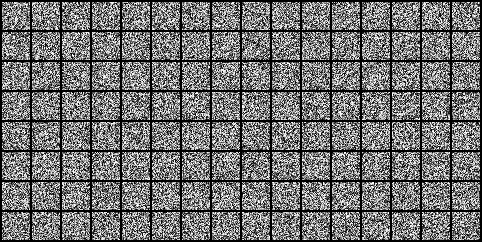

iter: 10

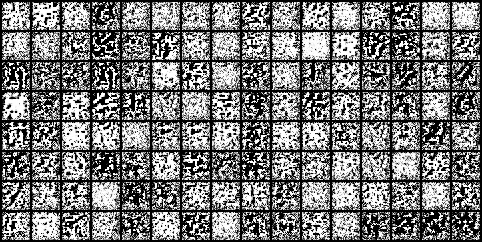

iter: 20

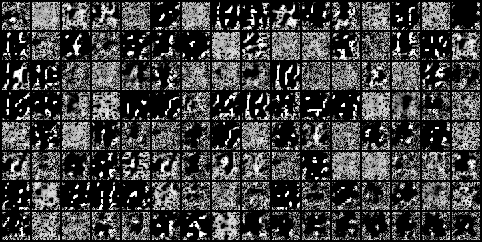

iter: 30

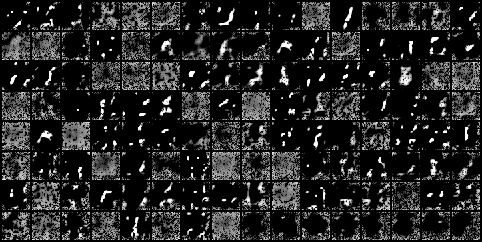

iter: 50

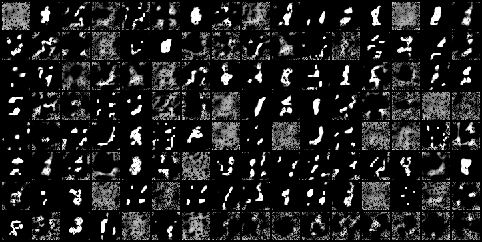

iter: 100

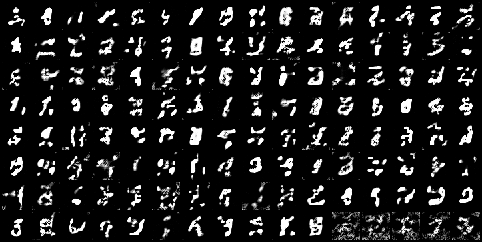

iter: 200

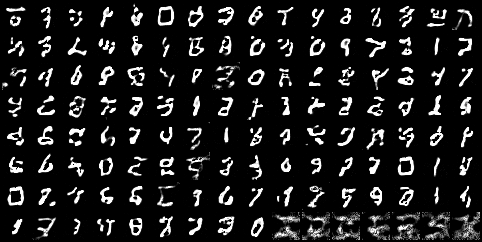

iter: 300

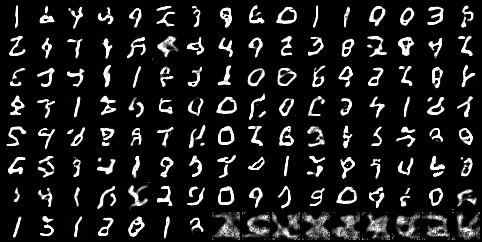

iter: 400

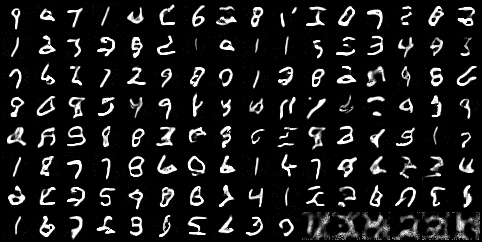

iter: 500

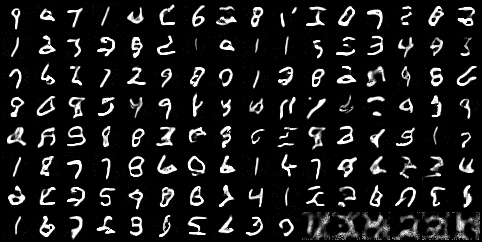

iter: 580

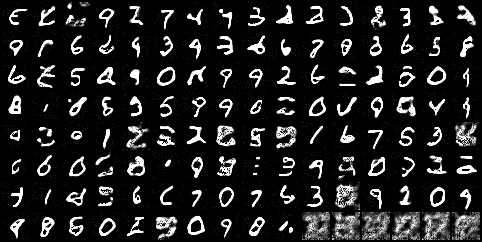

iter: 590

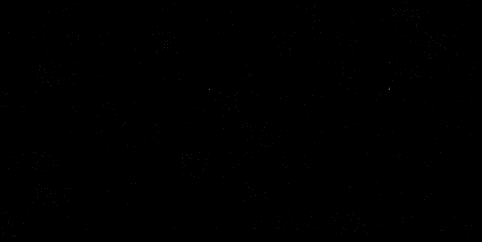